In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_indata(path):
    '''
    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data


## generate new column year for every data

def generate_year_month(df, colname):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    #df['indextype'] = str(string)
    return df

In [101]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [102]:
#generate year and month
airpollution = generate_year_month(airpollution, 'Date')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


In [103]:
def city_groupby(df, colname, city_name):
    '''
    :param df: dataframe we want to divide base on city name
    :param colname: the column name in the dataframe saved the city name
    :param city_name: the specific city name 
    :return: dataframe after filter city and year from 2012 to 2018, group by year and month
    '''
    df = df[(df[colname].str.contains(city_name)) & (df.year>=2012) & (df.year<2018)]
    df = df.groupby(['year','month']).agg({'mean'})

    return df

In [104]:
Chicago_airpollution = city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()
#airpollution[(airpollution['City']=='Chicago')]
#NYC_airpollution = city_groupby(airpollution, 'City', 'New York')
#NYC_airpollution.head()

#LA_airpollution = city_groupby(airpollution, 'City', 'Los Angeles')
#LA_airpollution.head()

AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [35]:
chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')
chicago_crime.head()
## count chicago crime
#chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).size()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [36]:
generate_year_month(chicago_crime, 'Date').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN,2012,1
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)",2012,1
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN,2012,1
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)",2012,1
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN,2012,1


In [66]:
chicago_crime = chicago_crime[(chicago_crime.year>=2012) & (chicago_crime.year<2018)]
chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).count().rename(columns={'ID':'count'})
chi_crime_per_month.head()

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [115]:
crime_airpollution = pd.merge(Chicago_airpollution, chi_crime_per_month,on=['year','month'])
crime_airpollution.columns=['AQI_mean', 'crime_count']

crime_airpollution

AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088
     6      97.400000        31075
     7      99.419355        31969
     8      93.387097        30034
     9      58.466667        27750
     10     54.225806        27957
     11     72.033333        26025
     12     57.193548        25207
2013 1      60.064516        25457
     2      58.678571        21394
     3      57.258065        24957
     4      56.266667        25521
     5      74.290323        27981
     6      70.233333        27362
     7      75.612903        28618
     8      65.322581        28640
     9      57.066667        26327
     10     54.774194        25458
     11     62.700000        23550
     12     67.645161        21848
2014 1      60.645161        19991
     2      76.428571        18014
     3      68.677419        22175
     4      66.166667        22897
     5      69.774194        24852
     6      73.833333        25414
...               ...          ...
2015 7      78.322581        24192
     8      62.580645        24769
     9      62.100000        23071
     10     49.064516        23050
     11     56.566667        20552
     12     48.290323        21115
2016 1      51.580645        20619
     2      55.551724        18693
     3      57.548387        22009
     4      64.233333        21115
     5      65.580645        23489
     6      85.400000        24016
     7      73.161290        24823
     8      65.709677        24856
     9      49.400000        23639
     10     44.645161        23702
     11     55.166667        21710
     12     52.258065        20346
2017 1      56.645161        22014
     2      57.428571        19258
     3      48.258065        20509
     4      52.266667        21639
     5      60.645161        23332
     6      78.566667        23794
     7      78.032258        24801
     8      60.354839        24660
     9      66.300000        22773
     10     43.838710        22852
     11     53.800000        21456
     12     54.806452        21037

[72 rows x 2 columns]

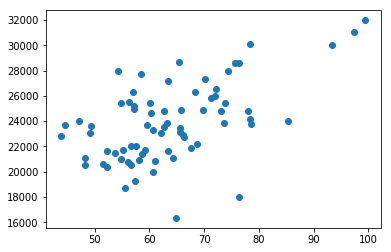

In [117]:
crime_airpollution.corr() 
plt.scatter(crime_airpollution.AQI_mean, crime_airpollution.crime_count)